In [1]:
from DFTDataFrame.Tools import create_frame, InputParameters, getparameter, checkforparameter, read_incar

from os import getcwd



In [2]:

def unlist(a, n=0):
    #print(a)
    if a == 0:
        return 0
    #print(a[1:-1].split(','))
    return int(a[1:-1].split(',')[n])


#def checkgroup(Frame, M, hkl, Slabsize, parameter, value, convergence=False):
#    tocheck = Frame.groupby('convergence').get_group(convergence)
#    print(checkforparameter(tocheck[(tocheck['Name'].str.contains(M+'-'+hkl)) & (tocheck['Slab size'].str.startswith(Slabsize))], parameter, value))
#    print(checkforparameter(tocheck[(tocheck['Name'].str.contains(M+'-'+hkl)) & (tocheck['Slab size'].str.startswith(Slabsize))], parameter, value))


In [3]:
root=getcwd()

Cu_slabs = create_frame('data/Cu/slabs', calc_file='final.traj', flag_file='final.traj')



CRITICAL:root:data/Cu/slabs/100/clean/2x2x4/OH/zeroAtoms/final.traj energy could not be read


Found 8 folders in data/Cu/slabs/


### 1. Obtaining the calc object from an Atoms object

In [4]:
Cu_slabs['parameters'] = Cu_slabs.apply(InputParameters, args=['struc'], axis=1) # Exctracting the ase.calc object from the ase.Atoms object in the column 'struc'
Cu_slabs['parameters']

100-clean-2x2x4                  {'encut': 500, 'sigma': 0.1, 'zab_vdw': -1.886...
100-clean-2x2x4-CO-1             {'encut': 500, 'sigma': 0.1, 'zab_vdw': -1.886...
100-clean-2x2x4-O                {'encut': 500, 'sigma': 0.1, 'zab_vdw': -1.886...
100-clean-2x2x4-H                {'encut': 500, 'sigma': 0.1, 'zab_vdw': -1.886...
100-clean-2x2x4-OH-complete      {'encut': 500, 'sigma': 0.1, 'zab_vdw': -1.886...
100-clean-2x2x4-OH-incomplete    {'encut': 500, 'sigma': 0.1, 'zab_vdw': -1.886...
100-clean-2x2x4-OH-missmatch     {'encut': 500, 'sigma': 0.1, 'zab_vdw': -1.886...
100-clean-2x2x4-OH-zeroAtoms                                                    {}
Name: parameters, dtype: object

### 2. Reading the Incar file

In [5]:
Cu_slabs['INCAR'] = Cu_slabs.apply(read_incar, axis=1) # reading the INCAR file in with the pymatgen package
Cu_slabs['INCAR']

100-clean-2x2x4-OH-zeroAtoms An error occured: FileNotFoundError


100-clean-2x2x4                  {'ENCUT': 500, 'SIGMA': 0.1, 'ZAB_VDW': -1.886...
100-clean-2x2x4-CO-1             {'ENCUT': 500, 'SIGMA': 0.1, 'ZAB_VDW': -1.886...
100-clean-2x2x4-O                {'ENCUT': 500, 'SIGMA': 0.1, 'ZAB_VDW': -1.886...
100-clean-2x2x4-H                {'ENCUT': 500, 'SIGMA': 0.1, 'ZAB_VDW': -1.886...
100-clean-2x2x4-OH-complete      {'ENCUT': 500, 'SIGMA': 0.1, 'ZAB_VDW': -1.886...
100-clean-2x2x4-OH-incomplete    {'ENCUT': 500, 'SIGMA': 0.1, 'ZAB_VDW': -1.886...
100-clean-2x2x4-OH-missmatch     {'ENCUT': 500, 'SIGMA': 0.1, 'ZAB_VDW': -1.886...
100-clean-2x2x4-OH-zeroAtoms                                                  None
Name: INCAR, dtype: object

# Check consistency of parameters

In [9]:
Cu_slabs.apply(getparameter, args=['xc'], axis=1).to_dict()

100-clean-2x2x4-OH-zeroAtoms An error occured: KeyError


{'100-clean-2x2x4': 'PBE',
 '100-clean-2x2x4-CO-1': 'PBE',
 '100-clean-2x2x4-O': 'PBE',
 '100-clean-2x2x4-H': 'PBE',
 '100-clean-2x2x4-OH-complete': 'PBE',
 '100-clean-2x2x4-OH-incomplete': 'PBE',
 '100-clean-2x2x4-OH-missmatch': 'PBE',
 '100-clean-2x2x4-OH-zeroAtoms': 0}

In [10]:
#As seen above most calculations use PBE as a functional. 
#To find the ones which fall out of this we can use the checkparameter function.
checkforparameter(Cu_slabs, 'xc', 'PBE')

100-clean-2x2x4-OH-zeroAtoms An error occured: KeyError
100-clean-2x2x4-OH-zeroAtoms    0


In [11]:
Cu_slabs.apply(getparameter, args=['encut'], axis=1).to_dict()


100-clean-2x2x4-OH-zeroAtoms An error occured: KeyError


{'100-clean-2x2x4': '500',
 '100-clean-2x2x4-CO-1': '500',
 '100-clean-2x2x4-O': '500',
 '100-clean-2x2x4-H': '500',
 '100-clean-2x2x4-OH-complete': '500',
 '100-clean-2x2x4-OH-incomplete': '500',
 '100-clean-2x2x4-OH-missmatch': '500',
 '100-clean-2x2x4-OH-zeroAtoms': 0}

In [12]:
checkforparameter(Cu_slabs, 'encut', '500') #only those calculaions who deviate from the parameters are shown

100-clean-2x2x4-OH-zeroAtoms An error occured: KeyError
100-clean-2x2x4-OH-zeroAtoms    0


In [13]:
Cu_slabs.apply(getparameter, args=['ediff'], axis=1).to_dict()

100-clean-2x2x4-OH-zeroAtoms An error occured: KeyError


{'100-clean-2x2x4': '1e-07',
 '100-clean-2x2x4-CO-1': '1e-05',
 '100-clean-2x2x4-O': '1e-07',
 '100-clean-2x2x4-H': '1e-07',
 '100-clean-2x2x4-OH-complete': '1e-07',
 '100-clean-2x2x4-OH-incomplete': '1e-07',
 '100-clean-2x2x4-OH-missmatch': '1e-07',
 '100-clean-2x2x4-OH-zeroAtoms': 0}

In [14]:
#It seems for one calculation ediff was changed to a lower value to make it converge.
checkforparameter(Cu_slabs, 'ediff', '1e-07')

100-clean-2x2x4-OH-zeroAtoms An error occured: KeyError
100-clean-2x2x4-CO-1            1e-05
100-clean-2x2x4-OH-zeroAtoms        0


# Kpoints

##### Kpoints cannot just be looked at indiviually. The Kpoints have to be compared to the size of the unit cell.

In [15]:
Cu_slabs['kpts'] = Cu_slabs.apply(getparameter, args=['kpts'], axis=1)

100-clean-2x2x4-OH-zeroAtoms An error occured: KeyError


In [16]:
Cu_slabs['k1'] = Cu_slabs['kpts'].apply(unlist,n=0)
Cu_slabs['k2'] = Cu_slabs['kpts'].apply(unlist,n=1)
Cu_slabs['k3'] = Cu_slabs['kpts'].apply(unlist,n=2)

In [17]:
Cu_slabs['k*a'] = 1/(Cu_slabs['k1']*Cu_slabs['a'])
Cu_slabs['k*b'] = 1/(Cu_slabs['k2']*Cu_slabs['b'])

In [18]:
Cu_slabs['k*a']
#It seems they are all the same. Which is good.

100-clean-2x2x4                  0.032159
100-clean-2x2x4-CO-1             0.032159
100-clean-2x2x4-O                0.032159
100-clean-2x2x4-H                0.032159
100-clean-2x2x4-OH-complete      0.032159
100-clean-2x2x4-OH-incomplete    0.032159
100-clean-2x2x4-OH-missmatch     0.032159
100-clean-2x2x4-OH-zeroAtoms          inf
Name: k*a, dtype: float64

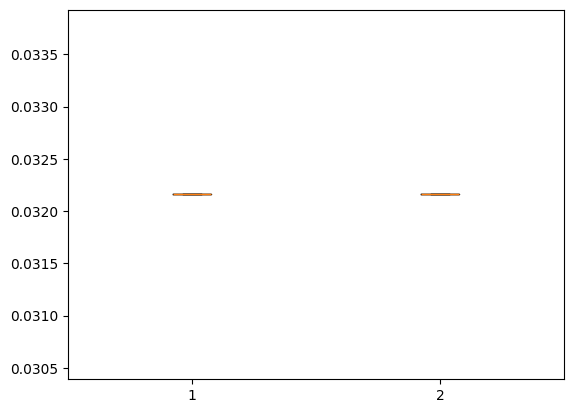

In [19]:
import matplotlib.pyplot as plt
plt.boxplot([Cu_slabs['k*a'], Cu_slabs['k*b']])
plt.show()


If one of the calculations has a different k points set than the other you will see boxplot like this

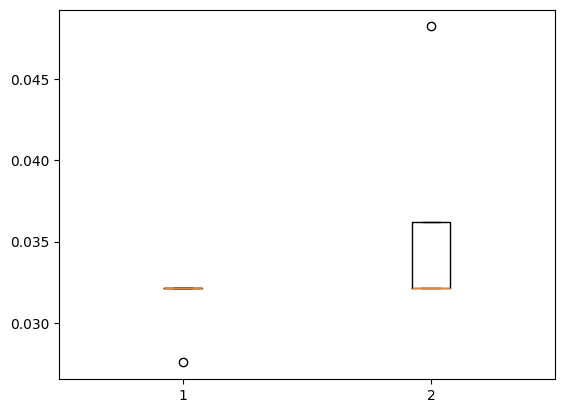

In [20]:

Cu_slabs.at['100-clean-2x2x4', 'k1'] = 7 # Lets say that K point is too high
Cu_slabs.at['100-clean-2x2x4', 'k2'] = 4 # and that K point is too low

Cu_slabs['k*a'] = 1/(Cu_slabs['k1']*Cu_slabs['a'])
Cu_slabs['k*b'] = 1/(Cu_slabs['k2']*Cu_slabs['b'])


plt.boxplot([Cu_slabs['k*a'], Cu_slabs['k*b']])
plt.show()

We can do the same with plotly instead of matplotlib to get immedeiate acces to the calculation.

In [25]:
import plotly.express as px
fig = px.box(Cu_slabs , y=["k*b", "k*a"], hover_name='Name', hover_data={'k1':True, 'k2':True})
fig.show()
#Hover with the mouse over the point